Import libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

Access data in pandas

In [6]:
df_image_size_per_month = pd.read_csv('images_website_size.csv')
df_total_size_per_month = pd.read_csv('total_website_size.csv')

df_image_size_per_month = df_image_size_per_month[df_image_size_per_month['client'] == 'desktop']
df_total_size_per_month = df_total_size_per_month[df_total_size_per_month['client'] == 'desktop']

df_image_size_per_month = pd.melt(df_image_size_per_month, id_vars=['date'], value_vars=['p10', 'p25','p50','p75', 'p90'],
                                  var_name='percentile', value_name='image_size')
df_total_size_per_month = pd.melt(df_total_size_per_month, id_vars=['date'], value_vars=['p10', 'p25','p50','p75', 'p90'],
                                    var_name='percentile', value_name='total_size')


df_all = pd.merge(df_image_size_per_month, df_total_size_per_month, on=['date', 'percentile'])
df_all['image_size_percentage'] = df_all['image_size'] / df_all['total_size']

df_all = pd.melt(df_all, id_vars=['date', 'percentile', 'image_size_percentage'], value_vars=['image_size', 'total_size'],
                 var_name='size_type', value_name='size')


# use colum date and create real date with the following example 2023_07_01
df_all['date'] = pd.to_datetime(df_all['date'], format='%Y_%m_%d') 


print(df_all.head())


        date percentile  image_size_percentage   size_type   size
0 2023-07-01        p10               0.143597  image_size  77.63
1 2023-06-01        p10               0.148099  image_size  78.66
2 2023-05-01        p10               0.152362  image_size  80.13
3 2023-04-01        p10               0.157659  image_size  81.59
4 2023-03-01        p10               0.159768  image_size  81.94


Visualize timeline 

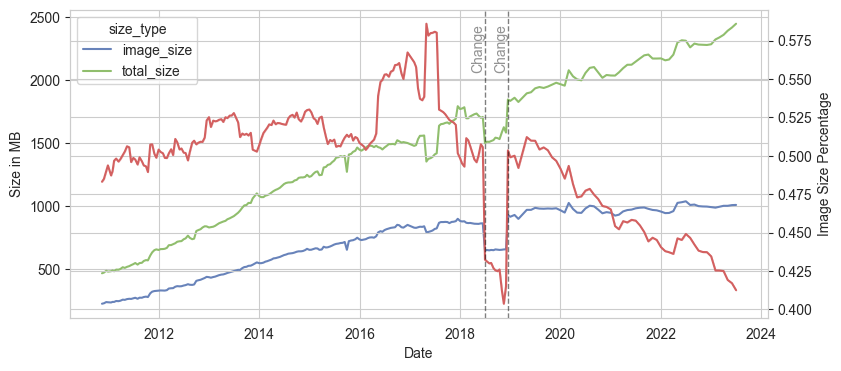

In [8]:
# only keep p50 
df_all = df_all[df_all.percentile == "p50"]

sns.set_style("whitegrid")
# creat linechart with image_size_pecentage
ax = sns.lineplot(x="date", y="size", hue="size_type", data=df_all, palette=["#6883BA","#90BE6D"])
ax.set(xlabel='Date', ylabel='Size in MB')

ax2 = plt.twinx()
sns.lineplot(data=df_all,x="date", y="image_size_percentage", ax=ax2, color="#D36060")
ax2.set(ylabel='Image Size Percentage')


# add a marker at first july 2018 with text "Data Adoption" 
ax2.axvline(pd.to_datetime("2018-07-01"), color='k', linestyle='--', linewidth=1, alpha=0.5)
ax2.text(pd.to_datetime("2018-07-01"), 0.57, "Change", rotation=90, verticalalignment='center', horizontalalignment='right', alpha=0.5)

# same for 15th of december 2018
ax2.axvline(pd.to_datetime("2018-12-15"), color='k', linestyle='--', linewidth=1, alpha=0.5)
ax2.text(pd.to_datetime("2018-12-15"), 0.57, "Change", rotation=90, verticalalignment='center', horizontalalignment='right', alpha=0.5)

fig = plt.gcf()
fig.set_size_inches(9, 4)

# change legend text 
plt.savefig("size_of_web_archive.pdf", dpi=300)


plt.show()